## Content

### kNN

- Blinkit Problem Statement
 - Issue with Logistic Regression

- Geometric Intuition



- The KNN Algorithm


- kNN Scratch Code


- Assumption of KNN


# **Business Case**

**Blinkit** is trying to find an **optimal number of delivery partners per store** for faster delivery

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/471/original/Screenshot_2023-07-23_at_7.43.57_PM.png?1690130758 width=700>



- Hence it has classified its store into 3 classes based on
 - how much products are delivered from a store

1. Class1 : High Traffic (Needs a high number of delivery partners)
2. Class2 : Moderate Traffic (Needs a decent number of delivery partners)
3. Class3 : Low Traffic (Needs a very small number of delivery partners)


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2


Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 27.5MB/s]


In [ ]:
df=pd.read_csv('multiclass.csv')
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


**Data Description**

|feature|Description|
|-|-|
|**Region**|where the store is located (1: Tier-1 city, 2: Tier-2 city, 3:Tier-3 city)|
|**Fresh**|Fresh food products delivery count |
|**Milk**|milk products delivery count|
|**Grocery**|Grocery products delivery count|
|**Frozen**|Frozen food products delivery count|
|**Detergents_Paper**|washing products delivery count|
|**Delicassen**|imported products, cooked meat delivery count|
|**class**|Store catgeory (Class1, Class2, Class3)|





Now lets see the count of sample each of the three classes

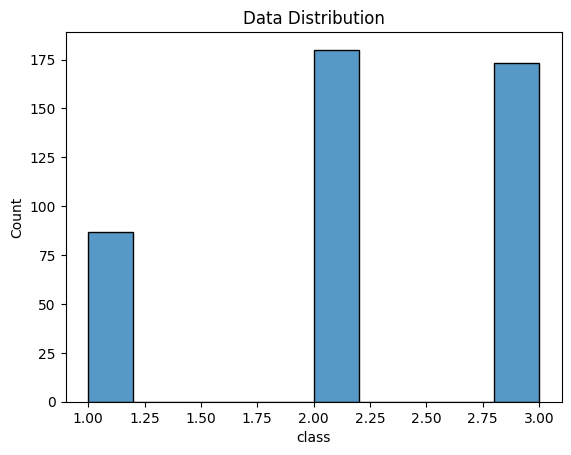

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x="class")
plt.title('Data Distribution')
plt.show()

Lets now define our X and y for the model and visualize the data

In [ ]:
X=df[['Region',	'Fresh',	'Milk',	'Grocery',	'Frozen',	'Detergents_Paper',	'Delicassen'	]].copy()
y=df[['class']].copy()

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


def scatter_visualize(visualize1,visualize2,y_label):
  scatter = plt.scatter(visualize[:,0] ,visualize[:,1],c = y.values[:,0] )
  plt.legend(handles=scatter.legend_elements()[0], labels=['Class1','Class2','Class3'])
  plt.show()

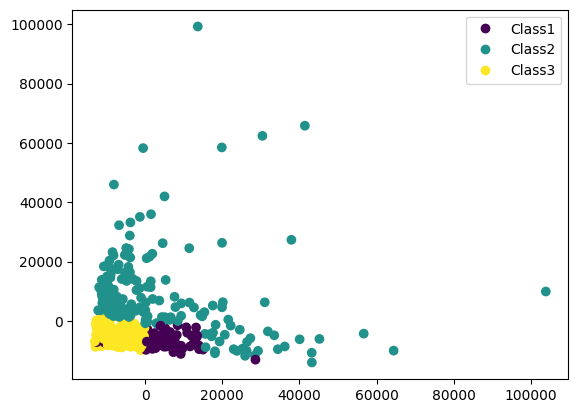

In [ ]:
# reducing features to just 2 features for visualization purpose
pca = PCA(n_components=2)
visualize = pca.fit_transform(X)


scatter_visualize(visualize[:,0] ,visualize[:,1],y.values[:,0])



**observe**

Data is not only **multi classed imbalanced** data
- It is also **Non-Linear in nature**



#### Imagine if data ($n \approx 1 million $), will Polynomial Logistic Regression model be the right model ?

Ans: No, Clearly it will require **a lot of hyperparameter tuning**:
- for finding the **correct polynomial features for Logistic Regression**


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/473/original/Screenshot_2023-07-23_at_7.44.08_PM.png?1690130923 width=700>


This process will be time consuming, hence not the ideal approach

<br>

#### If store categories changes from 3 to 50, will OVR be the ideal approach ?

Ans: No, since for a  **50 class data, 50 different Logistic Regression model** will be required:
-  This process will be both **Expensive and time consuming**

<br>

Hence **Polynomial OVR Logistic Regression model not the ideal approach**

# **Geometric Intuition of kNN**

#### What model can be used for this Non-linear Multi-Class data ?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/472/original/Screenshot_2023-07-23_at_7.44.16_PM.png?1690130898 width=700>

Imagine if our training data looks like:

1. Class 1 data $→ (+) $
2. Class 2 data $→ (-) $
3. Class 3 data $→ (o) $







#### If we have a test data sample,($x^{q1}$), what will be class label for it ?

Ans: Clearly, $x^{q1}$ belongs to $(+)$ Class


<br>

#### What will be the class label for ($x^{q2}$) ?
Ans: $x^{q2}$ belongs to $(-)$ Class


#### How are we sure that $(x^{q1})$ belongs to $(+)$ and $(x^{q2})$ belongs to $(-)$ class ?



Ans: Simply by:
- **Observing the neighboring points** of $(x^{q1})$ and noticing as most points belong to $(+)$ Class,
 - hence $(x^{q1})$ → $(+)$

- Similarly for $(x^{q2})$,  **most of the neighboring points → (-) class**
 - hence $(x^{q2})$ → $(-)$


<br>


kNN (k Nearest Neighbour) algorithm works on the same intuition:
- Defining **class of the test datapoint based** on the **classes of the neighbourhood** of that datapoint


# **Understanding kNN**

#### How does kNN work with neighborhood of datapoint ?

Ans: Lets understand kNN with an example, Suppose **we have a test datapoint ($x^q = [2,5]$) and we have 6 training data such that**:

||f1|f2|y|
|:--|:--|:--|:--|
|$x^{(1)}$|3|6|1
|$x^{(2)}$|6|4|1
|$x^{(3)}$|8|2|3
|$x^{(4)}$|7|5|3
|$x^{(5)}$|1|4|2
|$x^{(6)}$|2|2|2


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/474/original/Screenshot_2023-07-23_at_7.44.29_PM.png?1690130963 width=700>

1. **Step1:** We find the  **Euclidean distance between $x_q = [2,5]$ and all the training data.**


||f1|f2|y|$d^{(i)} = \sqrt{(x^q_{f1}-x^{(i)}_{f1})^2 + (x^q_{f2}-x^{(i)}_{f2})^2}$|
|:--|:--|:--|:--|:--|
|$x^{(1)}$|3|6|1|$\sqrt{(1^2 + 1^2)} = 1.41$|
|$x^{(2)}$|6|4|1|$\sqrt{(4^2 + 1^2)} = 3.00$|
|$x^{(3)}$|8|2|3|$\sqrt{(6^2 + 3^2)} = 6.48$|
|$x^{(4)}$|7|5|3|$\sqrt{(5^2 + 0^2)} = 5.00$|
|$x^{(5)}$|1|4|2|$\sqrt{(1^2 + 1^2)} = 1.41$|
|$x^{(6)}$|2|2|2|$\sqrt{(0^2 + 2^2)} = 2.00$|



  

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/475/original/Screenshot_2023-07-23_at_7.44.37_PM.png?1690130998 width=700>

2. **Step2:** We sort the data based on the distances:

||f1|f2|y|$d^{(i)}$|
|:--|:--|:--|:--|:--|
|$x^{(1)}$|3|6|1|$1.41$|
|$x^{(5)}$|1|4|2|$1.41$|
|$x^{(6)}$|2|2|2|$2.00$|
|$x^{(2)}$|6|4|1|$3.00$|
|$x^{(4)}$|7|5|3|$5.00$|
|$x^{(3)}$|8|2|3|$6.48$|

<br>


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/476/original/Screenshot_2023-07-23_at_7.44.47_PM.png?1690131021 width=700>


3. **Step 3:** Assume we pick the 3 datapoints such that:
-  The distance from $x_q$ is minimum

||f1|f2|y|$d^{(i)}$|
|:--|:--|:--|:--|:--|
|$x^{(1)}$|3|6|1|$1.41$|
|$x^{(5)}$|1|4|2|$1.41$|
|$x^{(6)}$|2|2|2|$2.00$|

Hence we pick $x^{(1)},x^{(5)},x^{(6)}$


<br>


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/477/original/Screenshot_2023-07-23_at_7.44.57_PM.png?1690131095 width=700>


4. **Step4:** Find the majority vote on the class $(y)$ for these selected datapoints:
- And the **class which is in majority** becomes the **class label for $x_q$**

hence here  Class of $x_q = 2$

<br>

**Note:** This selection of datapoints  is done using a hyperparameter $k$,
- hence the algorithm is called $k$ nearest neighbors



<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/479/original/Screenshot_2023-07-23_at_7.45.06_PM.png?1690131159 width=700>

#### What happens if $k = 4$ for kNN ?

Ans:  Lets look into the sorted data:

||f1|f2|y|$d^{(i)}$|
|:--|:--|:--|:--|:--|
|$x^{(1)}$|3|6|1|$1.41$|
|$x^{(5)}$|1|4|2|$1.41$|
|$x^{(6)}$|2|2|2|$2.00$|
|$x^{(2)}$|6|4|1|$3.00$|
|$x^{(4)}$|7|5|3|$5.00$|
|$x^{(3)}$|8|2|3|$6.48$|


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/478/original/Screenshot_2023-07-23_at_7.45.15_PM.png?1690131134 width=700>



Now we will select the nearest 4 datapoints:

||f1|f2|y|$d^{(i)}$|
|:--|:--|:--|:--|:--|
|$x^{(1)}$|3|6|1|$1.41$|
|$x^{(5)}$|1|4|2|$1.41$|
|$x^{(6)}$|2|2|2|$2.00$|
|$x^{(2)}$|6|4|1|$3.00$|


**observe**

$x^{(1)}$ and $x^{(2)}$ → Class1 while  $x^{(5)}$ and $x^{(6)}$ → Class2

**kNN cannot make a prediction**
- As there is a tie in majority vote

<br>


**note:** It is advisable to have $k \in odd$
- So  to avoid this issue of tie in majority vote.






Suppose we took $k =5 $ and the nearest neighbor looks like:

||y|
|:--|:--|
|$x^{(1)}$| 1 |
|$x^{(5)}$| 2 |
|$x^{(2)}$| 1 |
|$x^{(7)}$| 2 |
|$x^{(4)}$| 3 |


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/480/original/Screenshot_2023-07-23_at_7.45.24_PM.png?1690131190 width=700>


#### How to make prediction for when $k \in odd$ and have tie in majority vote ?
Ans: In such case, the hack is to:
- **Randomly pick the class label for any of the tied Classes**




For this example:

||y|
|:--|:--|
|$x^{(1)}$| 1 |
|$x^{(5)}$| 2 |
|$x^{(2)}$| 1 |
|$x^{(7)}$| 2 |
|$x^{(4)}$| 3 |


- kNN randomly picks Class1 or Class 2


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/482/original/Screenshot_2023-07-23_at_7.45.40_PM.png?1690131330 width=700>

# **kNN Scratch Code**

lets split the data into train, validation and test set

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(247, 7) (247, 1)
(83, 7) (83, 1)
(110, 7) (110, 1)


#### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smt = SMOTE()

X_sm, y_sm = smt.fit_resample(X_train, y_train)

In [ ]:
y_sm.value_counts()

class
1        99
2        99
3        99
dtype: int64

Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

st =  StandardScaler()

X_sm = st.fit_transform(X_sm.values)
X_val_scaled = st.transform(X_val.values)
X_test_scaled = st.transform(X_test.values)

y_sm = y_sm.values[:,0]
y_val = y_val.values[:,0]
y_test = y_test.values[:,0]

kNN Implementation from Scratch
 with k = 5

taking the 50th Val data as our $x_q$

In [ ]:
X_val_scaled[50]

array([ 0.7138225 , -0.60391056, -0.45630472, -0.65085666, -0.31171627,
       -0.5025302 , -0.2767165 ])

finding distance

In [ ]:
dist = np.sqrt(np.sum((X_val_scaled[50]-X_sm)**2,axis=1) )

print(dist.shape)

(297,)


In [ ]:
# Storing distance and Class labels together
distances = [(dist[i],y_sm[i]) for i in range(len(dist)) ]

# sort the distances
distances = sorted(distances)

In [ ]:
# Nearest/First K points
distances = distances[:5]

In [ ]:
distances = np.array(distances)

classes_counts = np.unique(distances[:,1],return_counts=True)

index = classes_counts[1].argmax()
pred = classes_counts[0][index]

print('kNN prediction:',pred)

kNN prediction: 3.0


In [ ]:
print('Neighbors[(distance),(Label)]:',distances)

Neighbors[(distance),(Label)]: [[0.19893067 3.        ]
 [0.20746875 3.        ]
 [0.23006218 3.        ]
 [0.28634191 3.        ]
 [0.29603924 3.        ]]


Formulating into one function

In [ ]:
def knn(X,Y,queryPoint,k):
    """Predict the class label for the query point"""
    # Euclidean Distance
    dist = np.sqrt(np.sum((queryPoint-X)**2,axis=1) )

    # Storing distance and Class labels together
    distances = [(dist[i],Y[i]) for i in range(len(dist)) ]
    # sort the distances
    distances = sorted(distances)
    # Nearest/First K points
    distances = distances[:k]

    distances = np.array(distances)

    classes_counts = np.unique(distances[:,1],return_counts=True)

    index = classes_counts[1].argmax()
    pred = classes_counts[0][index]

    return int(pred),distances

Predicted class label for $x_q$

In [ ]:
pred,neighbors = knn(X_sm, y_sm, X_val_scaled[50],5)

print(f'k nearest neighbors with the distance and class label :{neighbors}')

print(f'The predicted class label: {pred}')

k nearest neighbors with the distance and class label :[[0.19893067 3.        ]
 [0.20746875 3.        ]
 [0.23006218 3.        ]
 [0.28634191 3.        ]
 [0.29603924 3.        ]]
The predicted class label: 3


**Observe**

All the 5 datapoints which are closest to the $x^q$ have:
- The same class labels = 3

Hence due to majority vote:
- $x^q$ → Class3

<br>

Lets see what is the actual class label for $x^q$

In [ ]:
y_val[50]

3

This means that kNN correctly predicted $x^q$



In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = []

for i in range(X_test_scaled.shape[0]):
    output,_ = knn(X_sm, y_sm, X_test_scaled[i],5)
    y_pred.append(output)




cm = confusion_matrix(y_test,y_pred)


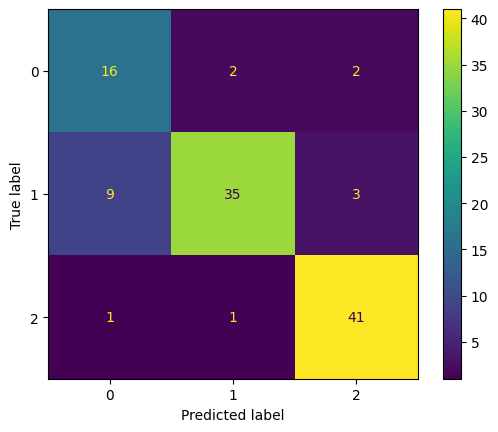

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(cm).plot()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.80      0.62      0.70        26
           2       0.74      0.92      0.82        38
           3       0.95      0.89      0.92        46

    accuracy                           0.84       110
   macro avg       0.83      0.81      0.81       110
weighted avg       0.85      0.84      0.83       110



**observe**

Clearly the kNN model performed quite well on the data, showing :
- kNN can handle Multi-Class problem
- kNN can handle Non-linearity in the data



# **Assumption of KNN:**

if data contains:
1. 33 $(+)$ Class samples
2. 33 $(-)$ Class samples
3. 33 $(o)$ Class samples

<br>

#### What assumption does kNN makes during prediction ?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/481/original/Screenshot_2023-07-23_at_7.45.57_PM.png?1690131249 width=700>

Ans: As kNN works on the principle that:
- All the **characteristic the majority nearest neighbors have, same** should be for the **query datapoint**

- hence **kNN assumes that the neighborhood** for a datapoint must be **homogeneous in nature (having same properties)**




Therefore if there is alot of noise/outliers in the data:


- kNN model fails in most cases